<h1>Classifying Breast Cancer Dataset - PCA for feature fusion</h1>

Problem: Is practicable to use PCA with this dataset?

<p>Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer</p>

<hr>

<h2>1. Collect data</h2>

<p>Data is standardized:</p>

<ul>
<li>a) Interval variables were convert to yours mean.</li>
<li>b) Missing values were kept to zero.</li>
</ul>

In [1]:
import pandas as pd

# Open the file and read it as table
file = open("dataset-full2.csv", "r")

df = pd.read_csv(file, names=['Class', 'Age', 'Age mean', 'Menopause','Tumor-size', 'Tumor-size mean', 'Inv-nodes', 'Inv-nodes mean', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'])
df

,Class,Age,Age mean,Menopause,Tumor-size,Tumor-size mean,Inv-nodes,Inv-nodes mean,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,34.5,premeno,30-34,32,0-2,1,no,3,left,left_low,no
1,no-recurrence-events,40-49,44.5,premeno,20-24,22,0-2,1,no,2,right,right_up,no
2,no-recurrence-events,40-49,44.5,premeno,20-24,22,0-2,1,no,2,left,left_low,no
3,no-recurrence-events,60-69,64.5,ge40,15-19,17,0-2,1,no,2,right,left_up,no
4,no-recurrence-events,40-49,44.5,premeno,0-4,2,0-2,1,no,2,right,right_low,no
5,no-recurrence-events,60-69,64.5,ge40,15-19,17,0-2,1,no,2,left,left_low,no
6,no-recurrence-events,50-59,54.5,premeno,25-29,27,0-2,1,no,2,left,left_low,no
7,no-recurrence-events,60-69,64.5,ge40,20-24,22,0-2,1,no,1,left,left_low,no
8,no-recurrence-events,40-49,44.5,premeno,50-54,52,0-2,1,no,2,left,left_low,no
9,no-recurrence-events,40-49,44.5,premeno,20-24,22,0-2,1,no,2,right,left_up,no


<h2>2. Normality Test</h2>

<p>Test to mean variables.</p>

In [2]:
from scipy import stats

mean_variables = ['Age mean', 'Tumor-size mean', 'Inv-nodes mean']
normal_variables = list()

for variable in mean_variables:
    var_test = df[variable]
    k2, p = stats.normaltest(var_test)
    alpha = 1e-3
    print("Variable: %s" % (variable))
    print("p = %s" % (p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected\n")
    else:
        print("The null hypothesis cannot be rejected")
        print("Feature comes from a normal distribution\n")
        normal_variables.append(variable)
print("Normal variables: %s" % (normal_variables))

Variable: Age mean
p = 0.00944546987698
The null hypothesis cannot be rejected
Feature comes from a normal distribution

Variable: Tumor-size mean
p = 0.529472683757
The null hypothesis cannot be rejected
Feature comes from a normal distribution

Variable: Inv-nodes mean
p = 7.47107744563e-44
The null hypothesis can be rejected

Normal variables: ['Age mean', 'Tumor-size mean']


<h2>3. Choose features (using PCA)</h2>

<p>2-dimensional features (Principal Components = 2)</p>
<p>Used to visualization.</p>

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separating out the features
x = df.loc[:, normal_variables].values
#x = StandardScaler().fit_transform(x) # Normal distribution standardization

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Create a matrix with class column
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
print(finalDf)

print("Variance ratios: %s" % (pca.explained_variance_ratio_))
print("Total: %s" % sum(pca.explained_variance_ratio_))

     principal component 1  principal component 2                 Class
0                -7.888727             -15.467630  no-recurrence-events
1                 3.761520              -7.450663  no-recurrence-events
2                 3.761520              -7.450663  no-recurrence-events
3                12.311602              11.308230  no-recurrence-events
4                23.428733             -11.083943  no-recurrence-events
5                12.311602              11.308230  no-recurrence-events
6                 0.661356               3.291263  no-recurrence-events
7                 7.394799              12.216550  no-recurrence-events
8               -25.739300              -2.000744  no-recurrence-events
9                 3.761520              -7.450663  no-recurrence-events
10               23.428733             -11.083943  no-recurrence-events
11                0.661356               3.291263  no-recurrence-events
12               17.228406              10.399910  no-recurrence

<h2>4. Plot without PCA vs. with PCA </h2>

<p>Projection of components after orthogonal transformation.</p>

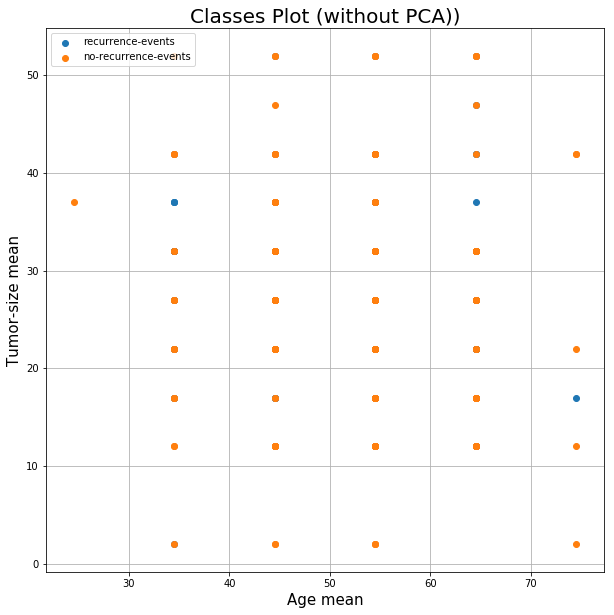

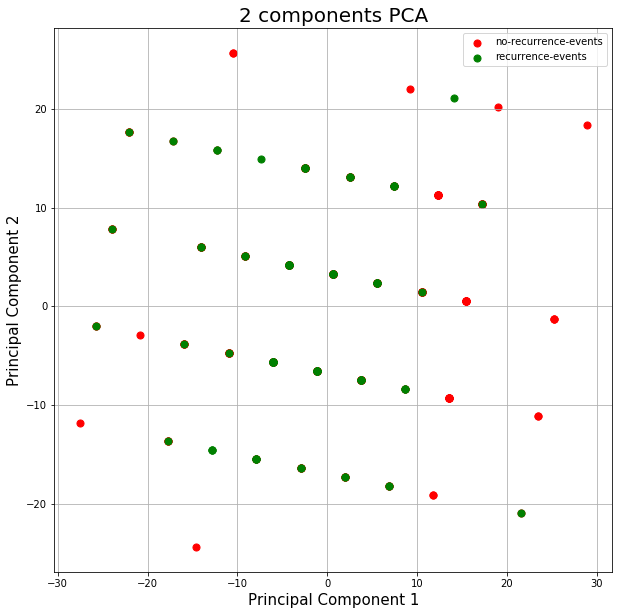

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel(normal_variables[0], fontsize = 15)
ax.set_ylabel(normal_variables[1], fontsize = 15)
ax.set_title('Classes Plot (without PCA))', fontsize = 20)

targets = ['recurrence-events', 'no-recurrence-events']
class1 = df.loc[df['Class'] == targets[1]].values
class2 = df.loc[df['Class'] == targets[0]].values
plt.scatter(class2[0:, 2], class2[0:, 5]) # Age mean
plt.scatter(class1[0:, 2], class1[0:, 5]) # Tumor-size mean
ax.legend(targets)
ax.grid()
plt.show();

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ['no-recurrence-events', 'recurrence-events']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(  finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show();

<h2>5. Get the correlation matrix</h2>

<p>Mean variables from dataset only.</p>
<p>Features with very little correlation.</p>

In [5]:
dfc = df[['Age mean', 'Tumor-size mean', 'Inv-nodes mean']] 
dfc.corr().values

array([[ 1.        , -0.02107258, -0.03511188],
       [-0.02107258,  1.        ,  0.13324274],
       [-0.03511188,  0.13324274,  1.        ]])

<h2>6. Bonus: PCA with 1 Principal Component</h2>

<p>1-dimensional features.</p>
<p>Used to fusion normal variables.</p>

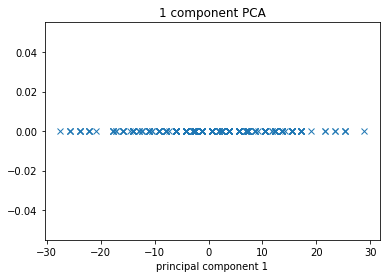

Variance ratios: [ 0.52944545]
Total: 0.529445448343


In [6]:
import numpy as np

x = df.loc[:, normal_variables].values
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
import matplotlib.pyplot as pp
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = principalDf['principal component 1'] # just as an example array
ax=plt.subplot(111)
ax.set_title('1 component PCA')
ax.set_xlabel('principal component 1')
pp.plot(ar, np.zeros_like(ar) + val, 'x')
pp.show()
print("Variance ratios: %s" % (pca.explained_variance_ratio_))
print("Total: %s" % sum(pca.explained_variance_ratio_))

<h2>7. Bonus: PCA with 2 Principal Components (mean variables)</h2>

<p>2-dimensional features (numeric variables only).</p>
<p>Used to fusion normal variables.</p>

Variance ratios: [ 0.50293327  0.44603061]
Total: 0.948963877209


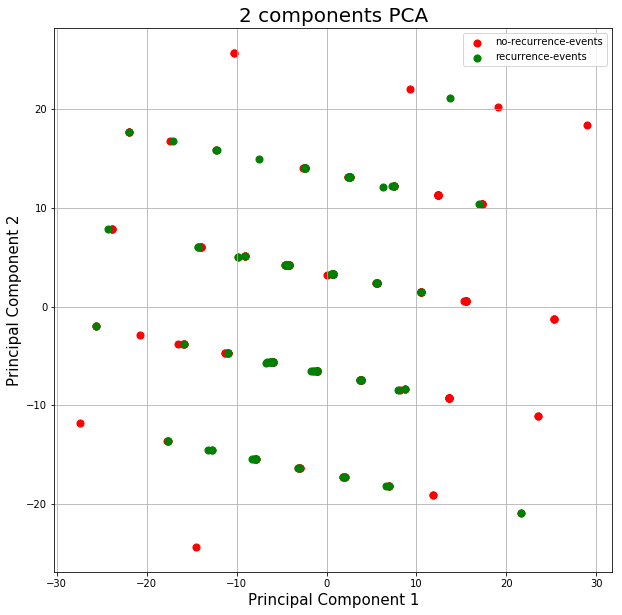

In [7]:
# Separating out the features
x = df.loc[:, mean_variables].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Create a matrix with class column
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

print("Variance ratios: %s" % (pca.explained_variance_ratio_))
print("Total: %s" % sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ['no-recurrence-events', 'recurrence-events']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(  finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show();

<h2>8. Bonus: PCA with 3 Principal Components (mean variables)</h2>

<p>3-dimensional features (numeric variables only).</p>
<p>Used to projection of components after orthogonal transformation. </p>

Variance ratios: [ 0.50293327  0.44603061  0.05103612]
Total: 1.0


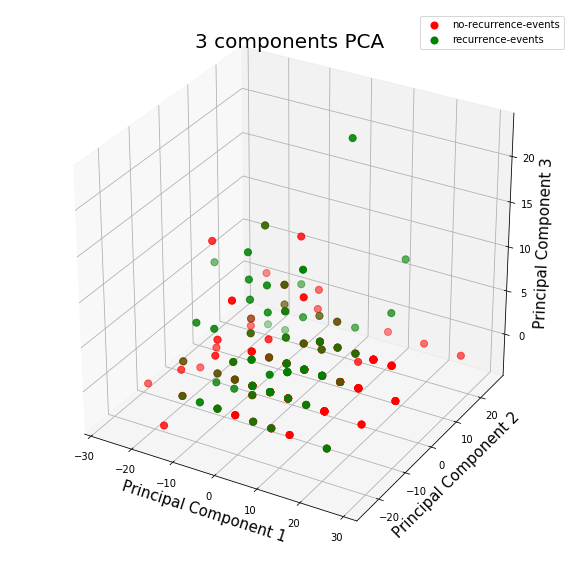

In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = df.loc[:, mean_variables].values
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

print("Variance ratios: %s" % (pca.explained_variance_ratio_))
print("Total: %s" % sum(pca.explained_variance_ratio_))

# Create the 3d chart
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 components PCA', fontsize = 20)
targets = ['no-recurrence-events', 'recurrence-events']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(  finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()